# Loan Prediction and Analysis for Siddiqui's Housing Scheme 1

*Author: Sufyan Siddiqui*
*18K-1161*
*Section C*

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [146]:
train_df = pd.read_csv('loan-train.csv')
test_df = pd.read_csv('loan-test.csv')
print("Train Data")
train_df.head()

Train Data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [147]:
print(train_df.shape)
print(test_df.shape)

(614, 13)
(367, 12)


In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [149]:
#Finding the count of null values
null_counts = train_df.isnull().sum()
null_counts

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [151]:
testinfo = test_df.info()
testinfo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [152]:
testnull = test_df.isnull().sum()
testnull

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [153]:
uniq_dep = test_df['Dependents'].unique()
print(uniq_dep)
print(test_df['Loan_Amount_Term'].unique())
uniq_cr_hist = test_df['Credit_History'].unique()
print(uniq_cr_hist)

['0' '1' '2' '3+' nan]
[360. 240. 180.  nan  60. 480.  84.  12. 300. 350.  36. 120.   6.]
[ 1. nan  0.]


In [154]:
cat=[]
num = []
for i in train_df:
    if train_df.dtypes[i] == 'object' and i != 'Loan_Status':
        cat.append(i)
    else:
        num.append(i)
print("Categorical Columns\n",cat)
num.remove('Loan_Status')
print("Numeric Columns\n",num)


Categorical Columns
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Numeric Columns
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [155]:
for i in cat:
    train_df[i].fillna(train_df[i].mode()[0],inplace=True)
    test_df[i].fillna(test_df[i].mode()[0],inplace=True)
for j in num:
    if j=='Credit_History':
        train_df[j].fillna(train_df[j].mode()[0],inplace=True)
        test_df[j].fillna(test_df[j].mode()[0],inplace=True)

    train_df[j].fillna(train_df[j].mean(),inplace=True)
    test_df[j].fillna(test_df[j].mean(),inplace=True)


In [156]:
train_df['Credit_History'].unique()

array([1., 0.])

In [157]:
testnull = test_df.isnull().sum()
testnull

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [158]:
null_counts = train_df.isnull().sum()
null_counts

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

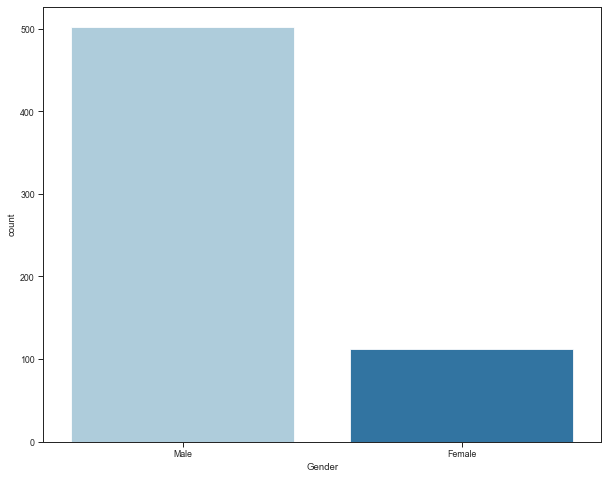

In [159]:
sns.set_style("ticks")
plt.figure(figsize=(10,8))
sns.set_context("paper")
palette = sns.color_palette("Paired")
sns.countplot(x=train_df['Gender'],palette=palette)

<AxesSubplot:xlabel='Education', ylabel='count'>

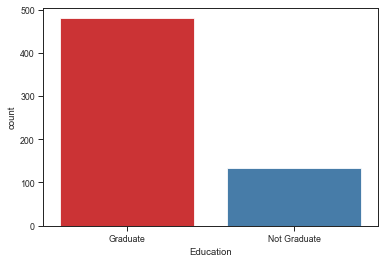

In [160]:
pallete = sns.color_palette("Set1",10)
sns.countplot(x=train_df['Education'],palette=pallete)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

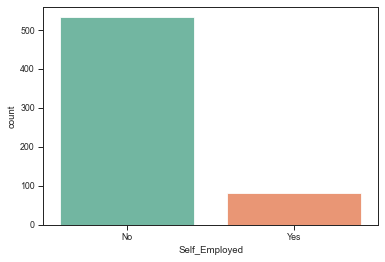

In [161]:
pallete = sns.color_palette("Set2",10)
sns.countplot(x=train_df['Self_Employed'],palette=pallete)

<AxesSubplot:xlabel='Married', ylabel='count'>

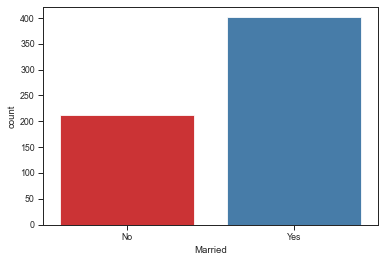

In [162]:
pallete = sns.color_palette("Set1",2)
sns.countplot(x=train_df['Married'],palette=pallete)

<AxesSubplot:xlabel='Married', ylabel='count'>

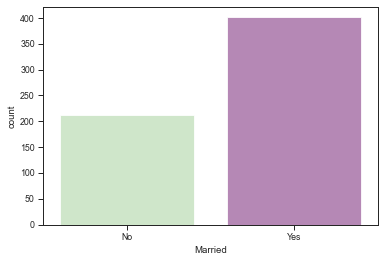

In [163]:
pallete = sns.color_palette("Set3_r",11)
sns.countplot(x=train_df['Married'],palette=pallete)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

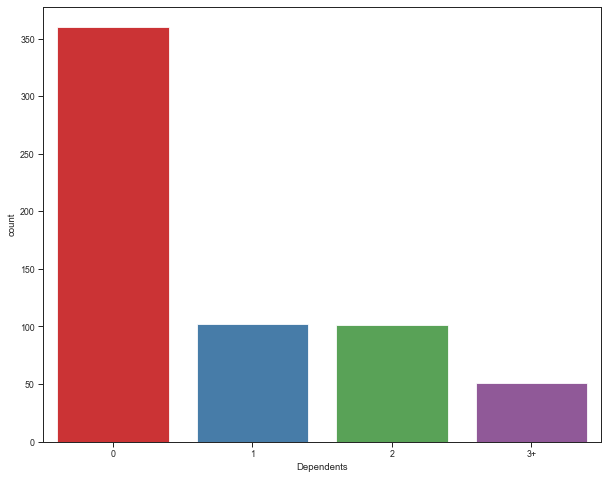

In [164]:
plt.figure(figsize=(10,8))
pallete = sns.color_palette("Set1")
sns.countplot(x=train_df['Dependents'],palette=pallete)

In [165]:
pd.crosstab(train_df.Dependents,train_df.Loan_Status,margins=True)

Loan_Status,N,Y,All
Dependents,,,
0,113,247,360
1,36,66,102
2,25,76,101
3+,18,33,51
All,192,422,614


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

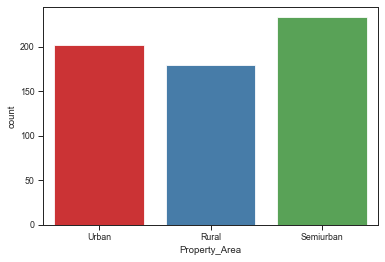

In [166]:
pallete = sns.color_palette("Set1")

sns.countplot(x=train_df['Property_Area'],palette=pallete)

In [167]:
pd.crosstab(train_df.Property_Area,train_df.Loan_Status,margins=True)

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [168]:
train_df['Dependents'].replace({'3+':'3'},inplace=True)
train_df['Dependents'].unique()


array(['0', '1', '2', '3'], dtype=object)

**Plotting numerical columns**

Mode: 2500
Mean: 5403.459283387622


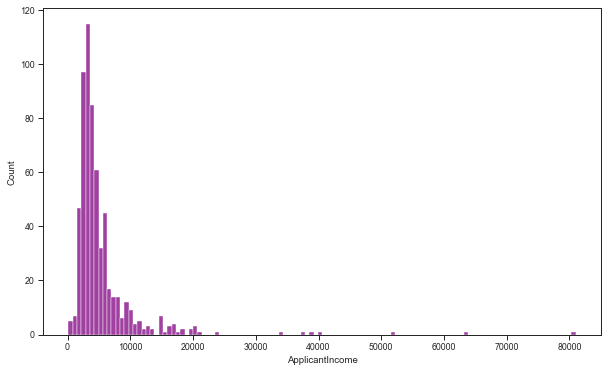

In [169]:
#pallete = sns.color_palette("Set1",10)
plt.figure(figsize=(10,6))
sns.histplot(x=train_df['ApplicantIncome'],color='purple')
print("Mode:",train_df['ApplicantIncome'].mode()[0])
print("Mean:",train_df['ApplicantIncome'].mean())



0.0
Mean: 1621.245798027101


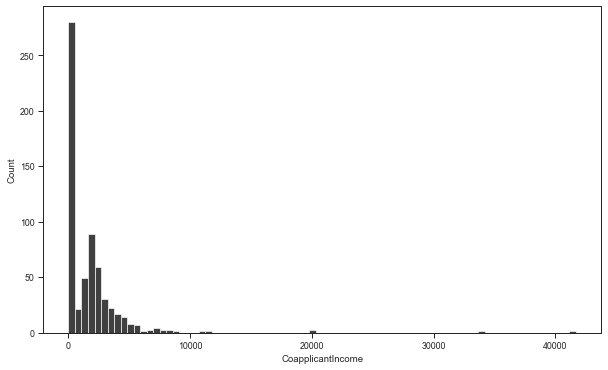

In [170]:
#print(train_df['CoapplicantIncome'].unique())
plt.figure(figsize=(10,6))
sns.histplot(train_df['CoapplicantIncome'],color='black')
print(train_df['CoapplicantIncome'].mode()[0])
print("Mean:",train_df['CoapplicantIncome'].mean())


Here the individuals who are having coapplicant income of 0 are the outliers

Now visualizing the total income of the applicants

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Mode: 6000.0
Mean: 7024.705081414722


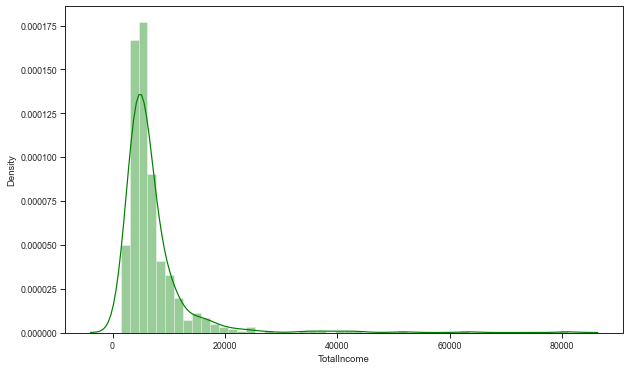

In [171]:
train_df['TotalIncome']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
pallete = sns.color_palette("bright")
plt.figure(figsize=(10,6))
sns.distplot(train_df['TotalIncome'],color='g')
print("Mode:",train_df['TotalIncome'].mode()[0])
print("Mean:",train_df['TotalIncome'].mean())

In [172]:
print(num)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
146.41216216216216
Mean: 146.41216216216213


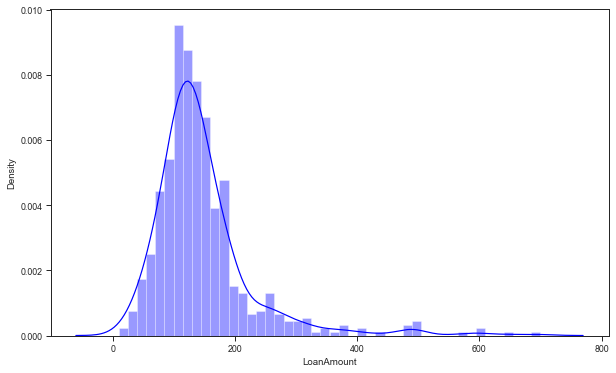

In [173]:
plt.figure(figsize=(10,6))
sns.distplot(train_df['LoanAmount'],color='blue')
print(train_df['LoanAmount'].mode()[0])
print("Mean:",train_df['LoanAmount'].mean())

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
360.0
Mean: 342.0


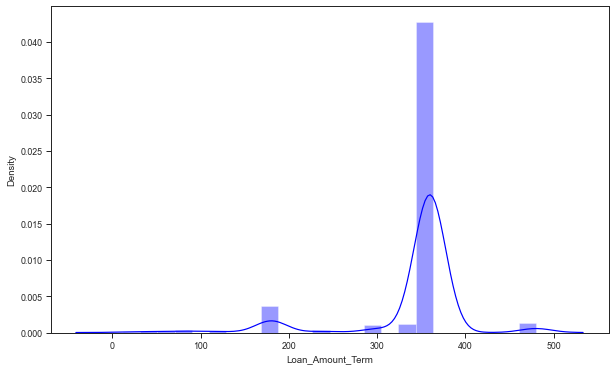

In [174]:
plt.figure(figsize=(10,6))
sns.distplot(train_df['Loan_Amount_Term'],color='blue')
print(train_df['Loan_Amount_Term'].mode()[0])
print("Mean:",train_df['Loan_Amount_Term'].mean())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
1.0
Mean: 0.8550488599348535
[1. 0.]


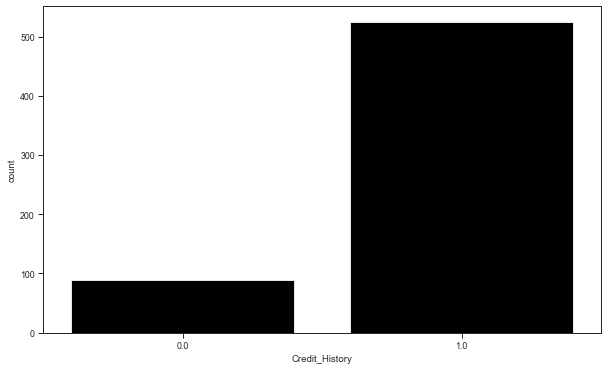

In [175]:
plt.figure(figsize=(10,6))
sns.countplot(train_df['Credit_History'],color='black')
print(train_df['Credit_History'].mode()[0])
print("Mean:",train_df['Credit_History'].mean())
print(train_df['Credit_History'].unique())

**Correlations**

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


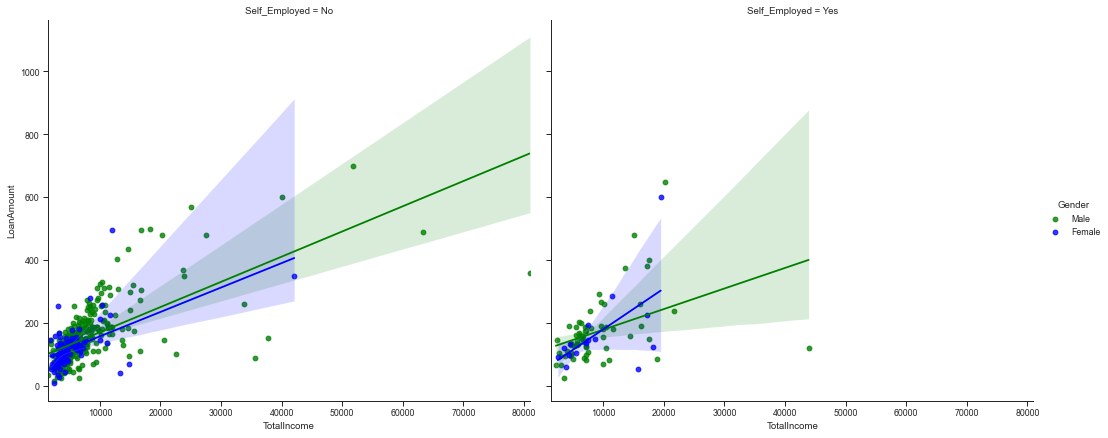

In [176]:
clrs = ["Green" , "Blue","Black"]
plot = sns.lmplot(x='TotalIncome',y='LoanAmount',data= train_df , col='Self_Employed', hue='Gender',palette= clrs ,aspect=1.2,size=6)


<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

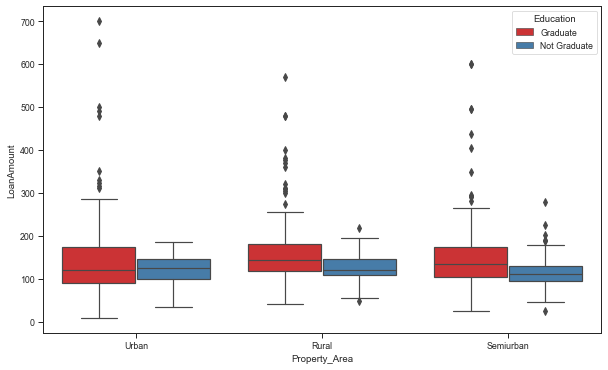

In [177]:
plt.figure(figsize=(10,6))
pallete = sns.color_palette("Set1")
sns.boxplot(x='Property_Area',y='LoanAmount',hue='Education',data=train_df,palette=pallete)


<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

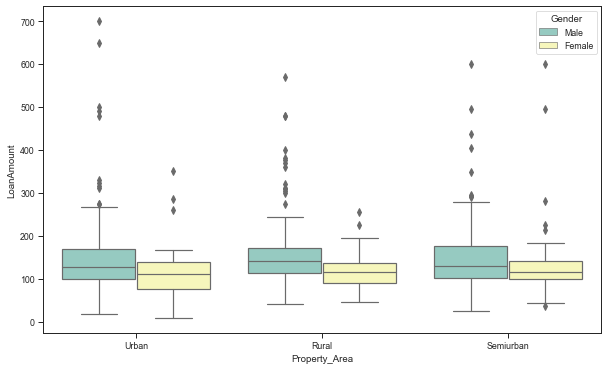

In [178]:
plt.figure(figsize=(10,6))
pallete = sns.color_palette("Set3")
sns.boxplot(x='Property_Area',y='LoanAmount',hue='Gender',data=train_df,palette=pallete)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

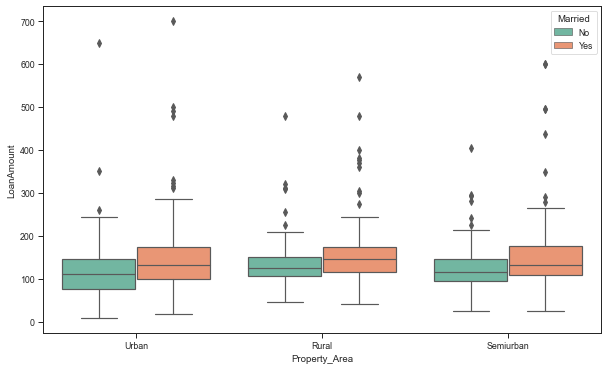

In [179]:
plt.figure(figsize=(10,6))
pallete = sns.color_palette("Set2")
sns.boxplot(x='Property_Area',y='LoanAmount',hue='Married',data=train_df,palette=pallete)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

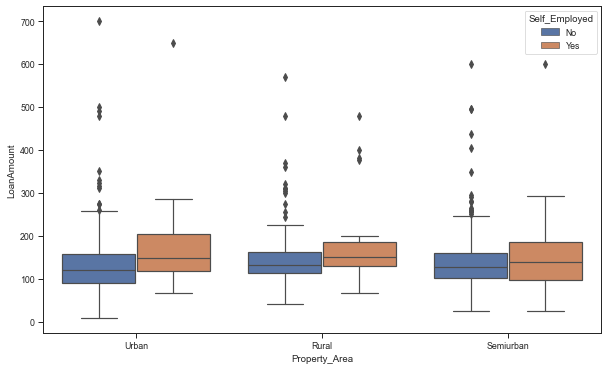

In [180]:
plt.figure(figsize=(10,6))
pallete = sns.color_palette("deep")
sns.boxplot(x='Property_Area',y='LoanAmount',hue='Self_Employed',data=train_df,palette=pallete)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

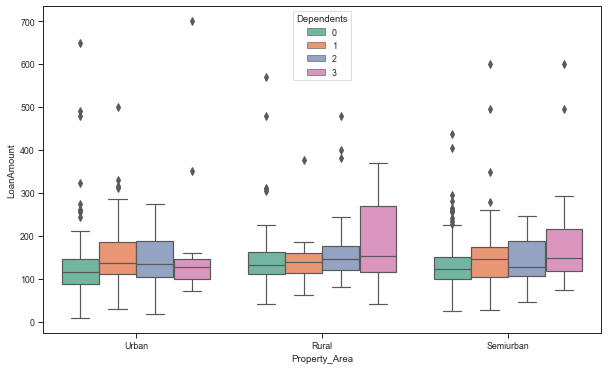

In [181]:
plt.figure(figsize=(10,6))
pallete = sns.color_palette("Set2")
sns.boxplot(x='Property_Area',y='LoanAmount',hue='Dependents',data=train_df,palette=pallete)

<AxesSubplot:xlabel='Credit_History'>

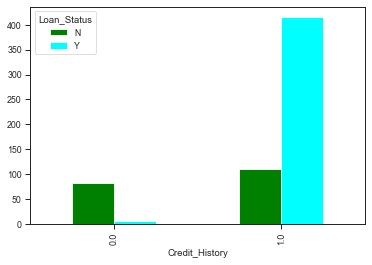

In [182]:
status = pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
status.plot(kind='bar',color=['green','cyan'])

<AxesSubplot:>

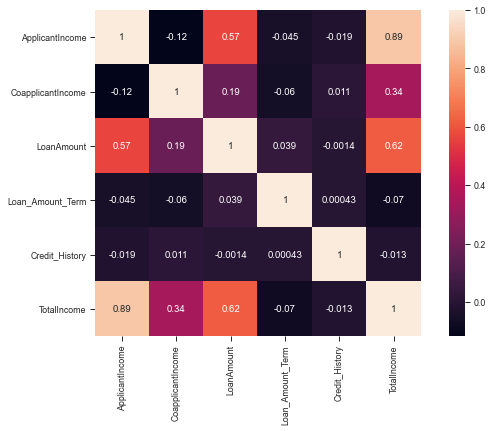

In [183]:
plt.figure(figsize=(10,6))
df = train_df.drop(columns=['Loan_ID','Loan_Status'])
#print(df.columns)
sns.heatmap(data=df.corr(),annot=True,square=True)

Preparing Train Data

In [184]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [185]:
loan_id = train_df['Loan_ID']
train_df.drop(columns=['Loan_ID'],inplace=True)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [186]:
train_df['Gender'].replace({'Male':1,'Female':0},inplace=True)
train_df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
train_df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2},inplace=True)
train_df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
train_df['Married'].replace({'Yes':1,'No':0},inplace=True)


In [187]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,Y,5849.0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N,6091.0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,Y,3000.0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,Y,4941.0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,Y,6000.0


In [188]:
loan_st = train_df['Loan_Status']
train_df.drop(columns=['Loan_Status'],inplace=True)
train_df['Loan_Status'] = loan_st 

In [189]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,5849.0,Y
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,N
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,3000.0,Y
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,4941.0,Y
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,6000.0,Y


Preparing Test Data

In [190]:
loan_id = test_df['Loan_ID']
test_df.drop(columns=['Loan_ID'],inplace=True)
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [191]:
test_df['Gender'].replace({'Male':1,'Female':0},inplace=True)
test_df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
test_df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2},inplace=True)
test_df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
test_df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [192]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


In [193]:
test_df['TotalIncome']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']

In [194]:
#train_df.drop(columns=['TotalIncome'],inplace=True)

In [195]:
#train_df.drop(columns=['Self_Employed','Education'],inplace=True)

In [196]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,5849.0,Y
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,N
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,3000.0,Y
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,4941.0,Y
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,6000.0,Y


In [197]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,5720
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,4576
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,6800
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,4886
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,3276


In [198]:
#test_df.drop(columns=['Self_Employed','Education'],inplace=True)

In [228]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [229]:
X = train_df.iloc[:,0:12]
Y = train_df.iloc[:,12]
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.3)

In [230]:
nb = GaussianNB()
dtree = DecisionTreeClassifier()
knn = KNeighborsClassifier(5)
lr = LogisticRegression(max_iter=2000)
rf = RandomForestClassifier()

In [231]:
vc = VotingClassifier(estimators=[('NaiveBayes',nb),('DecisionTree',dtree),('KNN',knn),('RandomForest',rf),('LogisticRegression',lr)],voting='soft')

In [232]:
t=tuple()
accuracies=[]
for clf,label in zip([nb,dtree,knn,rf,lr,vc],['NaiveBayes','DecisionTree','KNN','RandomForest','Logistic Regression','Ensemble']):
    scores = cross_val_score(clf,X,Y,scoring = 'accuracy')
    t=(label,scores.mean())
    accuracies.append(t)
    #print("Accuracy: %0.5f - %s" %(scores.mean(),label))

    


In [233]:
accuracies

[('NaiveBayes', 0.7882580301212848),
 ('DecisionTree', 0.7377848860455818),
 ('KNN', 0.6189790750366521),
 ('RandomForest', 0.7817806210848994),
 ('Logistic Regression', 0.8029188324670132),
 ('Ensemble', 0.791536718645875)]

In [243]:
test_df['Dependents'].replace({'3+':'3'},inplace=True)
test_df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,5720
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,4576
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,6800
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,4886
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,3276


In [258]:
model = lr.fit(X,Y)
ypred = model.predict(test_df)

#accuracy = accuracy_score(Y,ypred)
#rept = classification_report(ytest,ypred)




In [259]:
FinalReport = pd.DataFrame()

In [260]:
FinalReport['Applicant ID']=loan_id
FinalReport['Loan Approval']=ypred



In [250]:
model = lr.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest,ypred)
rept = classification_report(ytest,ypred)

In [251]:
print("Accuracy:",accuracy)
print(rept)

Accuracy: 0.8108108108108109
              precision    recall  f1-score   support

           N       0.89      0.34      0.49        50
           Y       0.80      0.99      0.88       135

    accuracy                           0.81       185
   macro avg       0.85      0.66      0.69       185
weighted avg       0.83      0.81      0.78       185



# Predicted Results for the Applicants

In [261]:
FinalReport

,Applicant ID,Loan Approval
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
